In [1]:
!pip install keras

     |████████████████████████████████| 1.3 MB 20.9 MB/s eta 0:00:01


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [3]:
# The code was removed by Watson Studio for sharing.

In [4]:
body = client_e823bd07adae40f1b197091998817f4c.get_object(Bucket='rossmannstoresalespredictionusing-donotdelete-pr-zzakwfslhxjybn',Key='train.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
df.shape

(1017209, 9)

In [6]:
body = client_e823bd07adae40f1b197091998817f4c.get_object(Bucket='rossmannstoresalespredictionusing-donotdelete-pr-zzakwfslhxjybn',Key='store.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )
    
store = pd.read_csv(body)
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [7]:
store.shape

(1115, 10)

In [8]:
data = df.merge(store, on = ['Store'], how = 'inner')
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [9]:
data.shape

(1017209, 18)

In [10]:
data.dtypes

Store                          int64
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [11]:
print('Distinct number of Stores:', len(data['Store'].unique()))
print('Distinct number of Stores:', len(data['Date'].unique()))
print('Average daily sales of all Stores:', round(data['Sales'].mean(), 2))

Distinct number of Stores: 1115
Distinct number of Stores: 942
Average daily sales of all Stores: 5773.82


In [12]:
data['DayOfWeek'].value_counts()

4    145845
5    145845
3    145665
2    145664
1    144730
6    144730
7    144730
Name: DayOfWeek, dtype: int64

In [13]:
data['Date'] = pd.to_datetime(data['Date'], infer_datetime_format = True)

data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Quarter'] = data['Date'].dt.quarter
data['Week'] = data['Date'].dt.week
data['Day'] = data['Date'].dt.day

data['Season'] = np.where(data['Month'].isin([3,4,5]), "Spring",
                 np.where(data['Month'].isin([6,7,8]), "Summer",
                 np.where(data['Month'].isin([9,10,11]), "Fall",
                 np.where(data['Month'].isin([12,1,2]), "Winter", "None"))))

<ipython-input-13-b0d02ba22bae>:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  data['Week'] = data['Date'].dt.week


In [14]:
data.iloc[:,-6:].head()

,Year,Month,Quarter,Week,Day,Season
0,2015,7,3,31,31,Summer
1,2015,7,3,31,30,Summer
2,2015,7,3,31,29,Summer
3,2015,7,3,31,28,Summer
4,2015,7,3,31,27,Summer


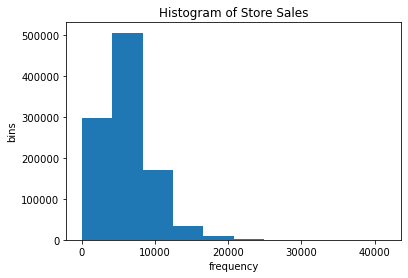

In [15]:
plt.hist(data['Sales'])
plt.title('Histogram of Store Sales')
plt.ylabel('bins')
plt.xlabel('frequency')
plt.show()

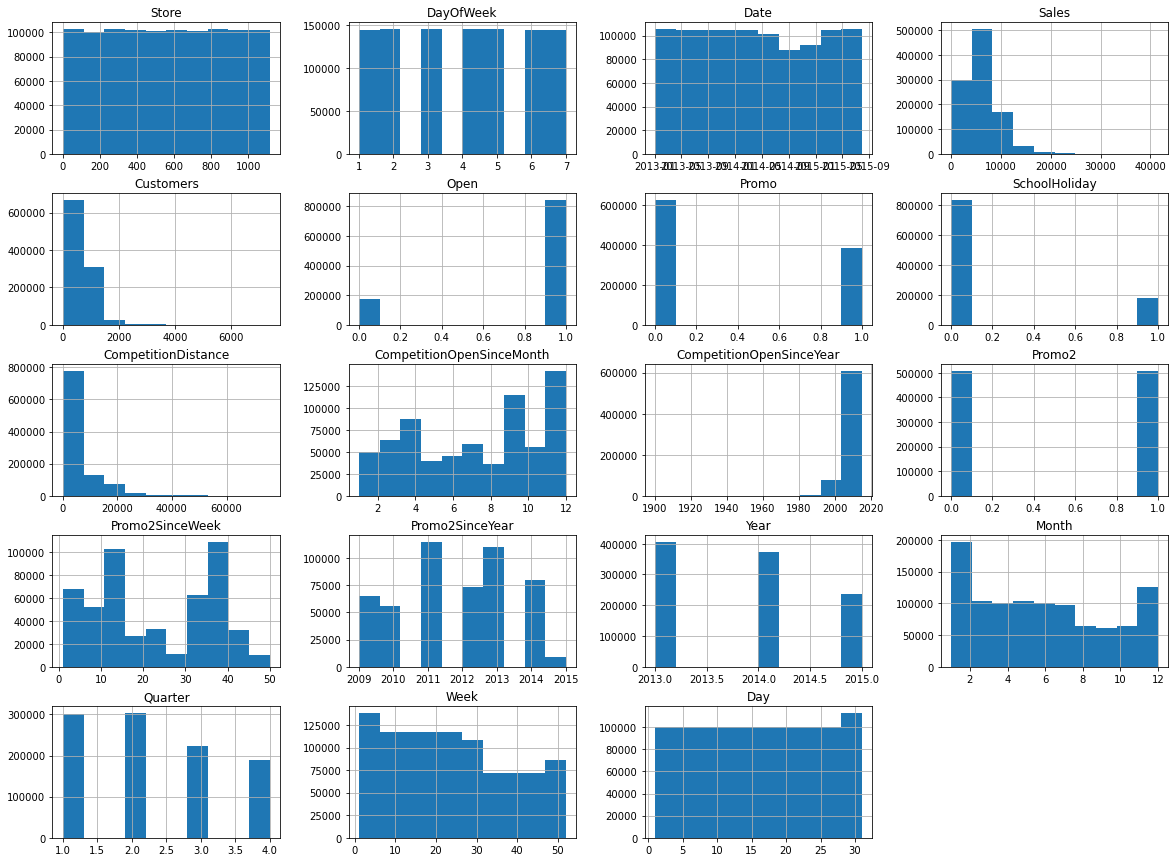

In [16]:
data.hist(figsize = (20,15))
plt.show()

In [17]:
data.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
Year                              0
Month                             0
Quarter                           0
Week                              0
Day                               0
Season                            0
dtype: int64

In [18]:
data['CompetitionDistance'] = data['CompetitionDistance'].fillna(data['CompetitionDistance'].mean())

In [19]:
target = ['Sales']
numeric_col = ['Customers', 'Open', 'Promo', 'Promo2', 'StateHoliday', 'SchoolHoliday', 'CompetitionDistance']
categorical_col = ['DayOfWeek', 'Quarter', 'Month', 'Year', 'StoreType', 'Assortment', 'Season']

def create_encode(df, col):
    le = LabelEncoder()
    a = le.fit_transform(data[col]).reshape(-1,1)
    ohe = OneHotEncoder(sparse=False)
    col_names = [col+ "_" + str(i) for i in le.classes_]
    return (pd.DataFrame(ohe.fit_transform(a), columns = col_names))

In [20]:
temp = data[numeric_col]

for col in categorical_col:
    temp_df = create_encode(data, col)
    temp = pd.concat([temp, temp_df], axis=1)

In [21]:
print('Shape of Data: ', temp.shape)
print('Distinct Datatypes: ', temp.dtypes.unique())

Shape of Data:  (1017209, 44)
Distinct Datatypes:  [dtype('int64') dtype('O') dtype('float64')]


In [22]:
temp['StateHoliday'] = np.where(temp['StateHoliday']=='0', 0,1)
temp.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(temp, data[target], test_size=0.2, random_state=1000)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1000)

In [24]:
print('Shape of X_train: ', X_train.shape)
print('Shape of X_val: ', X_val.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_val: ', y_val.shape)
print('Shape of y_test: ', y_test.shape)

Shape of X_train:  (732390, 44)
Shape of X_val:  (81377, 44)
Shape of X_test:  (203442, 44)
Shape of y_train:  (732390, 1)
Shape of y_val:  (81377, 1)
Shape of y_test:  (203442, 1)


In [45]:
model = Sequential()
model.add(Dense(150, input_dim=44, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 150)               6750      
_________________________________________________________________
dense_37 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_38 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_39 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 151       
Total params: 74,851
Trainable params: 74,851
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=128)

Epoch 1/20
5722/5722 [==============================] - 36s 6ms/step - loss: 3147386.4078 - mean_absolute_error: 1069.2124 - val_loss: 1202320.1250 - val_mean_absolute_error: 744.2314
Epoch 2/20
5722/5722 [==============================] - 34s 6ms/step - loss: 1212209.6498 - mean_absolute_error: 742.0169 - val_loss: 1133769.1250 - val_mean_absolute_error: 738.6688
Epoch 3/20
5722/5722 [==============================] - 35s 6ms/step - loss: 1115169.7307 - mean_absolute_error: 712.4390 - val_loss: 994695.5625 - val_mean_absolute_error: 669.2089
Epoch 4/20
5722/5722 [==============================] - 34s 6ms/step - loss: 1086358.1970 - mean_absolute_error: 700.6685 - val_loss: 1056807.0000 - val_mean_absolute_error: 694.3422
Epoch 5/20
5722/5722 [==============================] - 34s 6ms/step - loss: 1045268.5853 - mean_absolute_error: 685.7828 - val_loss: 1002032.8125 - val_mean_absolute_error: 674.8190
Epoch 6/20
5722/5722 [==============================] - 34s 6ms/step - loss: 1023720.

In [47]:
result = model.evaluate(X_test, y_test)

for i in range(len(model.metrics_names)): 
    print('Metric', model.metrics_names[i], ':', str(round(result[i], 2)))

6358/6358 [==============================] - 5s 797us/step - loss: 803613.3750 - mean_absolute_error: 600.3940
Metric loss : 803613.38
Metric mean_absolute_error : 600.39


In [51]:
prediction = model.predict(X_test)

In [52]:
prediction

array([[ 2.6579656e+03],
       [ 2.5964615e+01],
       [ 3.6993730e+03],
       ...,
       [ 3.2653516e+03],
       [-1.9358325e-01],
       [ 1.0067659e+04]], dtype=float32)